11 labels

apple, banana, orange, brocoli, corn, Enoki Mushroom (팽이버섯), Shiitake mushrooms (표고버섯), kimchi, cheese, sausage, tuna can

train pairs: 12978 /
test pairs: 159 /
valid pairs: 341 /
Total pairs: 13478

In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35601, done.
remote: Counting objects: 100% (4178/4178), done.
remote: Compressing objects: 100% (1815/1815), done.
remote: Total 35601 (delta 2884), reused 3484 (delta 2343), pack-reused 31423
Receiving objects: 100% (35601/35601), 29.69 MiB | 14.53 MiB/s, done.
Resolving deltas: 100% (25674/25674), done.


In [2]:
%cd ./ultralytics

/content/ultralytics


In [3]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00


In [5]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [6]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA A100-SXM4-40GB)


In [10]:
with open('/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807_v3/data.yaml', 'r') as file:
    print(file.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 11
names: ['Enoki Mushroom', 'Shiitake mushrooms', 'apple', 'banana', 'brocoli', 'cheese', 'corn', 'kimchi', 'orange', 'sausage', 'tuna can']

roboflow:
  workspace: d-ry6lg
  project: data_food_ingredients_0807
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/d-ry6lg/data_food_ingredients_0807/dataset/2


In [11]:
data_dir = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807_v3'
data_yaml = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807_v3/data.yaml'

In [13]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 11,
 'names': ['Enoki Mushroom',
  'Shiitake mushrooms',
  'apple',
  'banana',
  'brocoli',
  'cheese',
  'corn',
  'kimchi',
  'orange',
  'sausage',
  'tuna can'],
 'roboflow': {'workspace': 'd-ry6lg',
  'project': 'data_food_ingredients_0807',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/d-ry6lg/data_food_ingredients_0807/dataset/2'}}

In [14]:
import os

# 특정 폴더 내의 파일 수를 세는 함수
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# 각 'labels' 폴더의 파일 수 출력 함수
def count_files_in_labels_folders(label_folders):
    for folder in label_folders:
        file_count = count_files_in_directory(folder)
        print(f"{folder} 폴더의 파일 수: {file_count}개")

# 'labels' 폴더의 위치들
labels_folders = [
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/valid/images',
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/train/images',
    '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/test/images'
]

# 각 'labels' 폴더의 파일 수 출력
count_files_in_labels_folders(labels_folders)



/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/valid/images 폴더의 파일 수: 341개
/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/train/images 폴더의 파일 수: 12978개
/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807/test/images 폴더의 파일 수: 159개


In [15]:
from ultralytics import YOLO

In [16]:
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0807'
os.makedirs(checkpoint_dir, exist_ok=True)
import shutil

In [17]:
# 8월 6일자 모델, 55,000 개 단일 식자재 이미지셋에 대해서 50 에폭 돌린 상태 (0704 모델, 어느정도 학습된 모델에 기반해서 추가 학습됨)
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0806'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=50, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/0806/best.pt, data=/content/drive/MyDrive/DAB/Data_Food_Ingredients_0807_v3/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

100%|██████████| 755k/755k [00:00<00:00, 103MB/s]


Overriding model.yaml nc=36 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 307MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0807_v3/train/labels... 12978 images, 306 backgrounds, 0 corrupt: 100%|██████████| 12978/12978 [21:56<00:00,  9.86it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0807_v3/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 825, len(boxes) = 24525. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: Caching images (13.3GB RAM): 100%|██████████| 12978/12978 [00:38<00:00, 333.32it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0807_v3/valid/labels... 341 images, 13 backgrounds, 0 corrupt: 100%|██████████| 341/341 [00:29<00:00, 11.51it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/Data_Food_Ingredients_0807_v3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 62, len(boxes) = 839. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Caching images (0.3GB RAM): 100%|██████████| 341/341 [00:01<00:00, 331.19it/s]


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.75G     0.8789      2.092      1.332         56        640: 100%|██████████| 406/406 [00:56<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all        341        839        0.7      0.492      0.529      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.37G     0.6019     0.7431      1.095         52        640: 100%|██████████| 406/406 [00:51<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        341        839      0.765      0.693      0.747      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.36G     0.5571     0.6006      1.062         61        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all        341        839      0.782      0.772      0.801      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.4G     0.5511     0.5772      1.053         70        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]

                   all        341        839      0.764      0.772      0.791      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.4G      0.518     0.5241      1.034         66        640: 100%|██████████| 406/406 [00:49<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.57it/s]

                   all        341        839      0.765      0.719      0.784      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.36G     0.4982      0.495      1.025         64        640: 100%|██████████| 406/406 [00:49<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        341        839      0.763      0.764      0.814      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.36G     0.4801     0.4735      1.015         61        640: 100%|██████████| 406/406 [00:50<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all        341        839      0.867      0.718       0.84      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.38G     0.4649     0.4582      1.006         57        640: 100%|██████████| 406/406 [00:49<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all        341        839      0.769      0.794      0.826      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.4G     0.4543     0.4463      1.002         51        640: 100%|██████████| 406/406 [00:49<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all        341        839      0.787      0.826      0.854      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.36G     0.4408     0.4321     0.9952         57        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]

                   all        341        839      0.796      0.786      0.846      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.36G     0.4327     0.4182      0.988         56        640: 100%|██████████| 406/406 [00:49<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]

                   all        341        839      0.814      0.821      0.849      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.36G     0.4214     0.4088     0.9853         63        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all        341        839      0.799      0.798      0.845      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.36G     0.4173     0.4013     0.9801         62        640: 100%|██████████| 406/406 [00:49<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        341        839      0.803      0.817      0.844      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.4G     0.4089     0.3935      0.978         67        640: 100%|██████████| 406/406 [00:49<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.00it/s]

                   all        341        839      0.814      0.791       0.84      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.4G     0.4045     0.3915     0.9753         60        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        341        839      0.821      0.828      0.879       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.35G     0.3985       0.38      0.972         63        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all        341        839      0.821      0.823      0.859      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.4G     0.3876       0.37     0.9678         49        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]

                   all        341        839       0.84       0.82      0.868      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.35G     0.3852     0.3681     0.9643         59        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        341        839      0.818      0.858      0.879       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.38G     0.3799     0.3607     0.9632         59        640: 100%|██████████| 406/406 [00:50<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]

                   all        341        839      0.808      0.861      0.878      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.4G     0.3754     0.3592     0.9615         76        640: 100%|██████████| 406/406 [00:50<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.97it/s]

                   all        341        839      0.854      0.813      0.888      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.38G     0.3658     0.3489     0.9576         61        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all        341        839      0.846      0.819      0.884       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.4G     0.3658     0.3437     0.9567         66        640: 100%|██████████| 406/406 [00:49<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        341        839      0.871      0.824      0.884      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.36G     0.3577     0.3413     0.9523         85        640: 100%|██████████| 406/406 [00:49<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        341        839      0.836      0.826      0.863      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.35G      0.356     0.3375     0.9538         67        640: 100%|██████████| 406/406 [00:49<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]

                   all        341        839       0.83      0.848       0.88      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.36G     0.3501     0.3289     0.9516         60        640: 100%|██████████| 406/406 [00:49<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]

                   all        341        839      0.843      0.842      0.883      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.36G     0.3439     0.3261     0.9499         50        640: 100%|██████████| 406/406 [00:49<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all        341        839      0.838      0.828       0.88      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.38G     0.3403     0.3208     0.9469         70        640: 100%|██████████| 406/406 [00:49<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]

                   all        341        839      0.865       0.85      0.889      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.35G      0.338     0.3142     0.9448         65        640: 100%|██████████| 406/406 [00:49<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]

                   all        341        839      0.853      0.867       0.89      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.38G     0.3342     0.3109     0.9441         71        640: 100%|██████████| 406/406 [00:50<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.96it/s]

                   all        341        839      0.865      0.855      0.895      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.36G     0.3311      0.307     0.9409         62        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        341        839      0.835      0.865       0.89      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.37G     0.3238     0.3016     0.9388         59        640: 100%|██████████| 406/406 [00:49<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]

                   all        341        839      0.854      0.849      0.885      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.4G     0.3203      0.297      0.937         46        640: 100%|██████████| 406/406 [00:49<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all        341        839      0.821      0.875      0.894      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.4G     0.3194     0.2946     0.9376         54        640: 100%|██████████| 406/406 [00:49<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        341        839      0.887      0.835      0.895      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.38G     0.3161     0.2918     0.9337         52        640: 100%|██████████| 406/406 [00:49<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all        341        839      0.886      0.832        0.9      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.38G     0.3055     0.2853     0.9318         57        640: 100%|██████████| 406/406 [00:49<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.56it/s]

                   all        341        839      0.884      0.847      0.895      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.4G      0.307     0.2868     0.9316         49        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        341        839      0.885      0.871      0.912      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.38G     0.3031     0.2805     0.9289         62        640: 100%|██████████| 406/406 [00:49<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.65it/s]

                   all        341        839      0.902      0.833      0.902      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.38G     0.2999     0.2777     0.9293         48        640: 100%|██████████| 406/406 [00:49<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.64it/s]

                   all        341        839      0.864      0.873      0.904      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.36G     0.2978     0.2732     0.9295         56        640: 100%|██████████| 406/406 [00:49<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.58it/s]

                   all        341        839      0.855       0.87      0.903      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.35G     0.2918     0.2682     0.9247         59        640: 100%|██████████| 406/406 [00:49<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.86it/s]

                   all        341        839      0.899      0.861      0.918      0.733


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.7G     0.6722      0.534      1.124         42        640: 100%|██████████| 406/406 [00:50<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        341        839      0.892      0.848      0.914      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.36G     0.6328      0.488      1.087         28        640: 100%|██████████| 406/406 [00:48<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.68it/s]

                   all        341        839      0.881       0.87      0.918       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.38G     0.6188     0.4635      1.078         49        640: 100%|██████████| 406/406 [00:48<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]

                   all        341        839      0.891      0.864      0.916      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.38G     0.6042     0.4428      1.065         33        640: 100%|██████████| 406/406 [00:48<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]

                   all        341        839      0.918      0.854      0.916      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.38G     0.5844     0.4285      1.052         26        640: 100%|██████████| 406/406 [00:48<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.61it/s]

                   all        341        839      0.896      0.879      0.922      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.38G     0.5753     0.4153      1.045         24        640: 100%|██████████| 406/406 [00:48<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]

                   all        341        839      0.897      0.874       0.92      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.38G     0.5676     0.4039      1.039         25        640: 100%|██████████| 406/406 [00:48<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.03it/s]

                   all        341        839      0.914      0.851      0.916      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.38G     0.5605     0.3902       1.03         31        640: 100%|██████████| 406/406 [00:48<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all        341        839      0.887      0.881      0.913      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.38G     0.5483     0.3815      1.023         29        640: 100%|██████████| 406/406 [00:48<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all        341        839      0.881      0.873      0.912      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.38G     0.5412     0.3708       1.02         29        640: 100%|██████████| 406/406 [00:48<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.59it/s]

                   all        341        839      0.914      0.848       0.91      0.747



50 epochs completed in 0.718 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.2MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]


                   all        341        839      0.896      0.879      0.922      0.754
        Enoki Mushroom         28         34      0.966       0.84      0.948      0.694
    Shiitake mushrooms         56        281       0.79      0.828       0.88       0.67
                cheese         51         52      0.873      0.923      0.941      0.851
                  corn         29         69      0.973      0.986      0.994      0.783
                kimchi         73         80      0.977      0.938      0.967      0.778
               sausage         83        311      0.747       0.64      0.726       0.62
              tuna can          8         12      0.945          1      0.995       0.88
Speed: 0.2ms preprocess, 6.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  5,  6,  7,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d123e1d6680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047

Save & Inference (영빈아 내가 추가했어)

In [18]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train
events.out.tfevents.1723050355.9c054f68c794.2666.0
val_batch2_labels.jpg
val_batch0_labels.jpg
train_batch2.jpg
train_batch16240.jpg
val_batch0_pred.jpg
labels.jpg
val_batch1_pred.jpg
P_curve.png
val_batch2_pred.jpg
labels_correlogram.jpg
train_batch16242.jpg
confusion_matrix_normalized.png
F1_curve.png
PR_curve.png
train_batch0.jpg
train_batch16241.jpg
train_batch1.jpg
weights
results.csv
R_curve.png
args.yaml
val_batch1_labels.jpg
confusion_matrix.png
results.png


In [29]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0807/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/0807/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/0807/last.pt


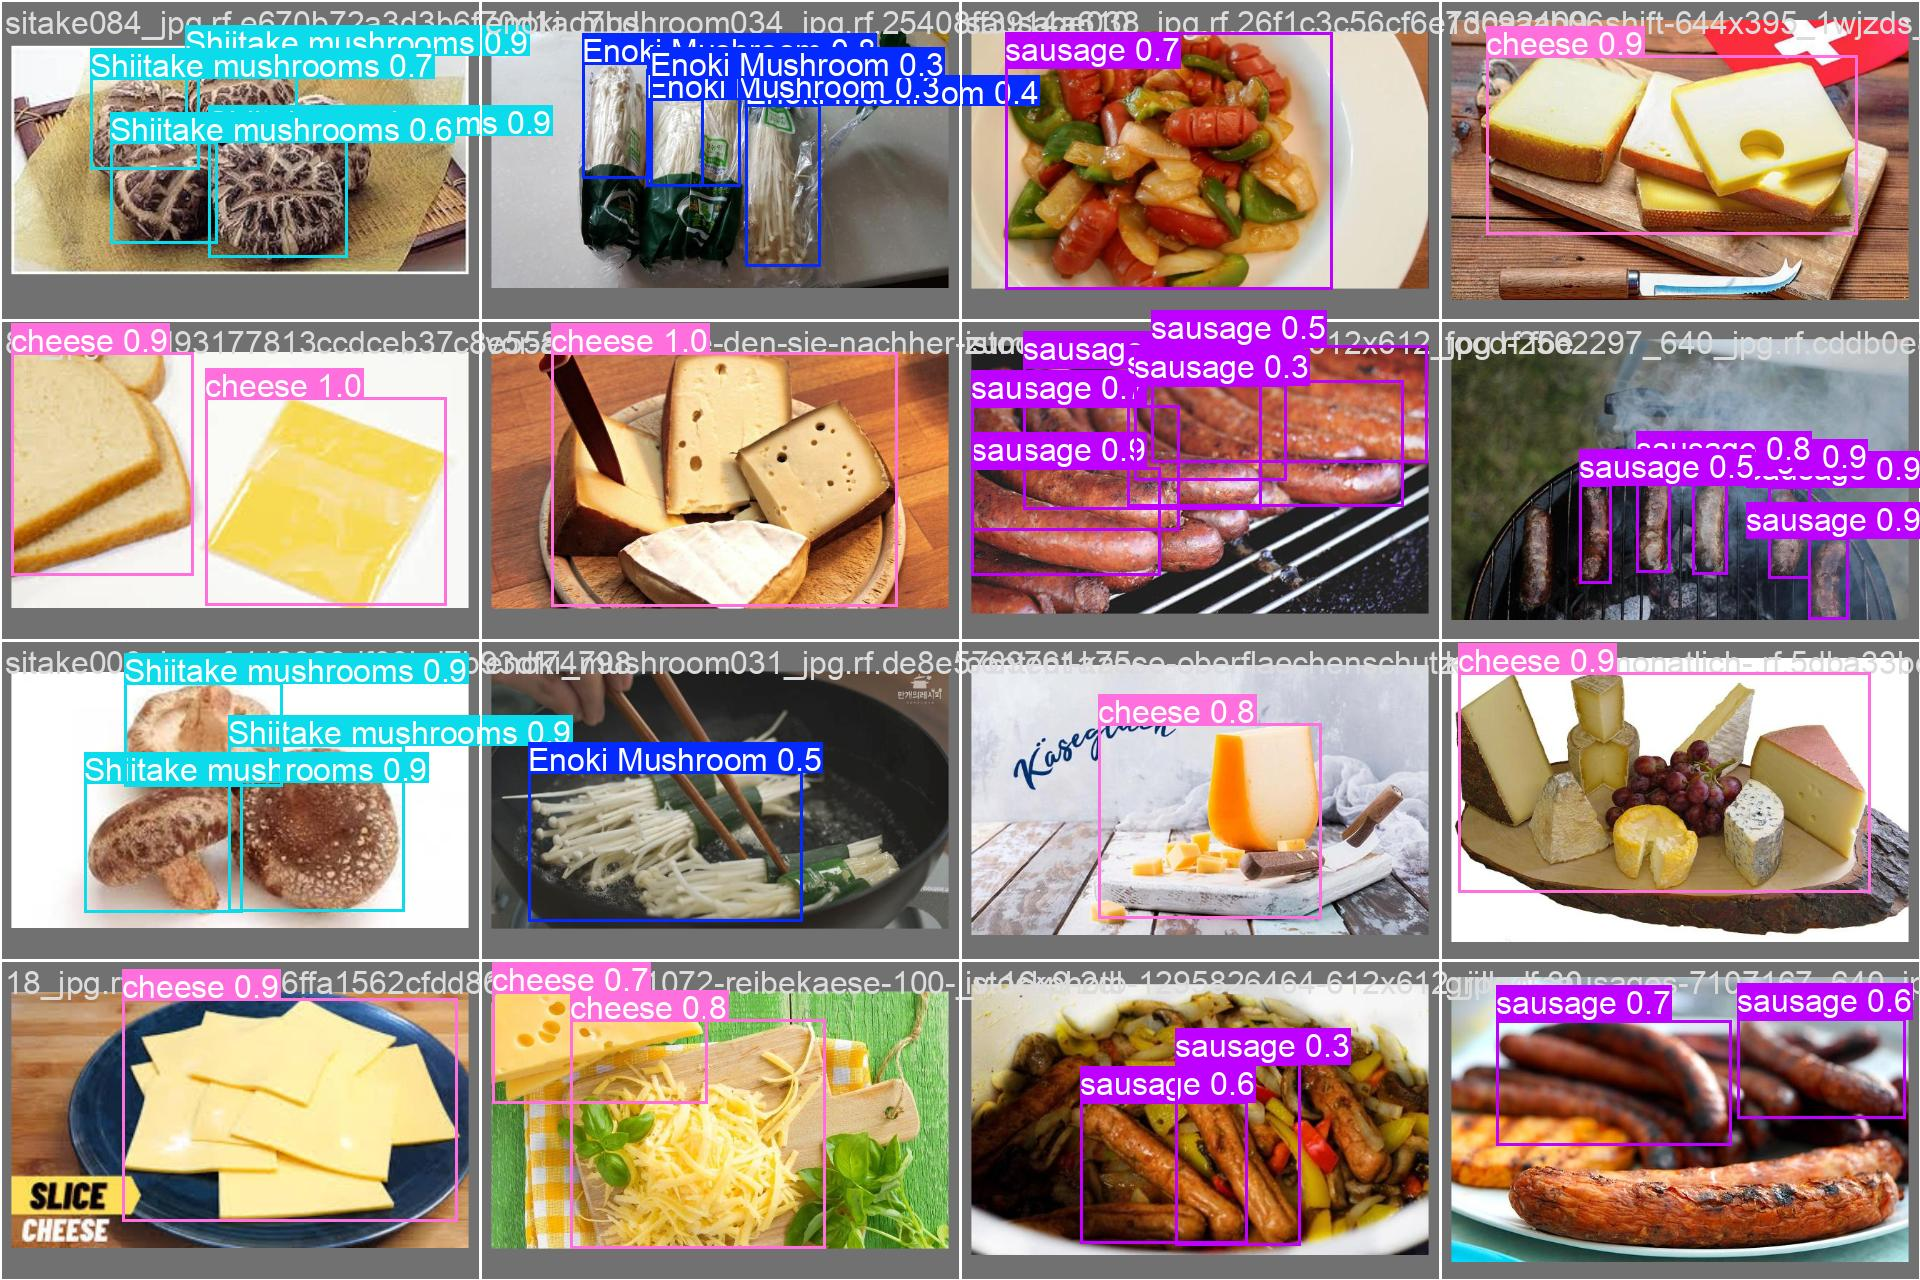

In [34]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train/val_batch0_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp3.jpg: 640x640 1 Shiitake mushrooms, 10.1ms
Speed: 2.8ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


array([[[104, 121, 124],
        [102, 119, 122],
        [102, 119, 122],
        ...,
        [140, 155, 158],
        [152, 167, 170],
        [161, 176, 179]],

       [[107, 124, 127],
        [105, 122, 125],
        [103, 120, 123],
        ...,
        [133, 148, 151],
        [144, 159, 162],
        [152, 167, 170]],

       [[113, 130, 133],
        [109, 126, 129],
        [105, 122, 125],
        ...,
        [130, 145, 148],
        [141, 156, 159],
        [148, 163, 166]],

       ...,

       [[103, 115, 125],
        [109, 121, 131],
        [120, 132, 142],
        ...,
        [154, 160, 171],
        [160, 166, 177],
        [163, 169, 180]],

       [[101, 113, 123],
        [106, 118, 128],
        [116, 128, 138],
        ...,
        [163, 169, 180],
        [172, 178, 189],
        [177, 183, 194]],

       [[ 96, 108, 118],
        [100, 112, 122],
        [109, 121, 131],
        ...,
        [169, 175, 186],
        [181, 187, 198],
        [187, 193, 204]]], dtype=uint8)
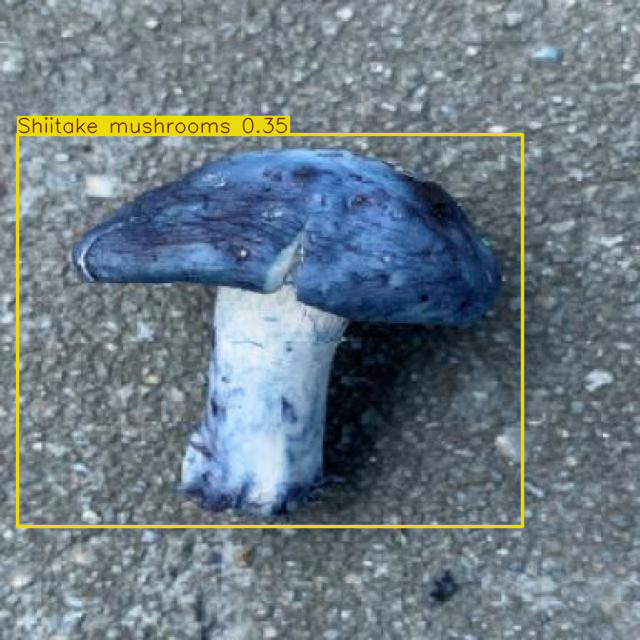

In [39]:
# 처음 마주하는 이미지에 대한 추론 시각화
results = model('/content/drive/MyDrive/DAB/inference_sample/tmp3.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화